Projekt MNwS - Aleksander Folfas 411052

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Zadanie 21

Za pomocą odpowiednich symulacji zbadać odsetek odrzuceń prawdziwej hipotezy głównej (tzn. błąd
I rodzaju) w teście istotności współczynnika korelacji w przypadku, gdy dane pochodzą z rozkładu 𝜒
2
i
rozkładu −1 ∙ 𝜒
2
(tzn. generujemy dane z rozkładu 𝜒
2
i mnożymy je przez -1). W trakcie symulowania
danych należy pamiętać, by dane spełniały hipotezę główną. Porównać uzyskane wyniki dla wsp.
korelacji Pearsona i Spearmana.
Uzyskane wyniki należy opisać w zależności od:
- liczby danych,
- liczby stopni swobody generowanego rozkładu 𝜒
2


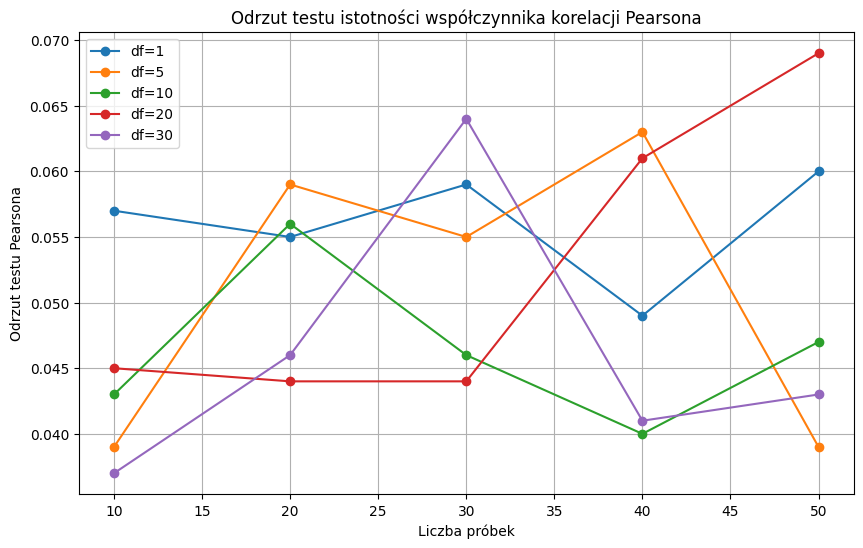

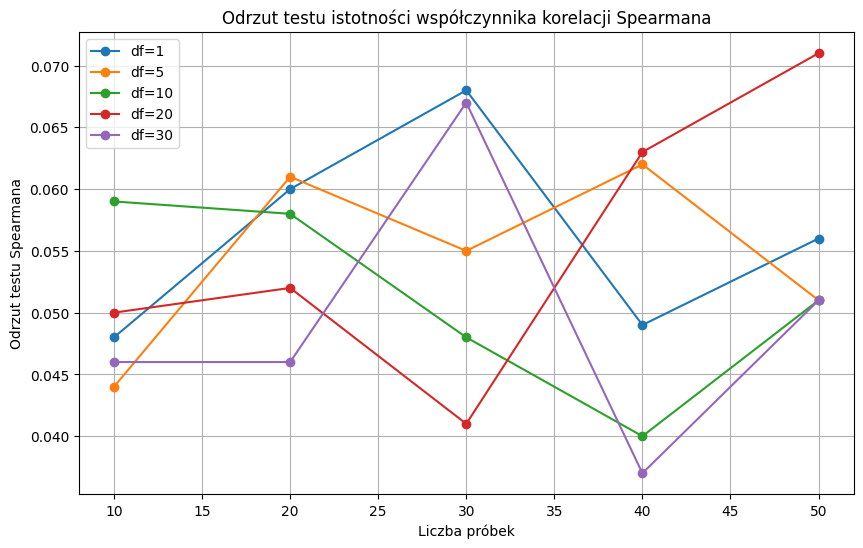

In [4]:

def rejection_rate_correlation(n_samples, df, n_simulations=1000):
    pearson_rejections = 0
    spearman_rejections = 0

    for _ in range(n_simulations):
        # Generowanie danych z rozkładu 𝜒^2 i -1 * 𝜒^2
        group1 = np.random.chisquare(df, size=n_samples)
        group2 = -1 * np.random.chisquare(df, size=n_samples)

        # Test istotności współczynnika korelacji Pearsona
        pearson_r, pearson_pvalue = stats.pearsonr(group1, group2)
        if pearson_pvalue < 0.05:
            pearson_rejections += 1

        # Test istotności współczynnika korelacji Spearmana
        spearman_rho, spearman_pvalue = stats.spearmanr(group1, group2)
        if spearman_pvalue < 0.05:
            spearman_rejections += 1

    pearson_rejection_rate = pearson_rejections / n_simulations
    spearman_rejection_rate = spearman_rejections / n_simulations

    return pearson_rejection_rate, spearman_rejection_rate

# Parametry symulacji
n_samples_range = [10, 20, 30, 40, 50]
df_range = [1, 5, 10, 20, 30]
np.random.seed(411052)

pearson_rejection_rates = np.zeros((len(n_samples_range), len(df_range)))
spearman_rejection_rates = np.zeros((len(n_samples_range), len(df_range)))

# Symulacje dla różnych wartości liczby danych i stopni swobody rozkładu 𝜒^2
for i, n_samples in enumerate(n_samples_range):
    for j, df in enumerate(df_range):
        pearson_rejection_rate, spearman_rejection_rate = rejection_rate_correlation(n_samples, df)
        pearson_rejection_rates[i, j] = pearson_rejection_rate
        spearman_rejection_rates[i, j] = spearman_rejection_rate

# Wykresy dla testu istotności współczynnika korelacji Pearsona
plt.figure(figsize=(10, 6))
for j, df in enumerate(df_range):
    plt.plot(n_samples_range, pearson_rejection_rates[:, j], '-o', label=f'df={df}')
plt.xlabel('Liczba próbek')
plt.ylabel('Odrzut testu Pearsona')
plt.title('Odrzut testu istotności współczynnika korelacji Pearsona')
plt.legend()
plt.grid(True)
plt.show()

# Wykresy dla testu istotności współczynnika korelacji Spearmana
plt.figure(figsize=(10, 6))
for j, df in enumerate(df_range):
    plt.plot(n_samples_range, spearman_rejection_rates[:, j], '-o', label=f'df={df}')
plt.xlabel('Liczba próbek')
plt.ylabel('Odrzut testu Spearmana')
plt.title('Odrzut testu istotności współczynnika korelacji Spearmana')
plt.legend()
plt.grid(True)
plt.show()